In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath(''))
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## Functions

In [2]:
results_dict = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'CV_test', 'CV_results.pkl'))

In [3]:
results_dict.keys()

dict_keys(['best_epoch', 'train_losses', 'losses', 'accs', 'iso_accs', 'sensitivities', 'specificities', 'F1_scores', 'iso_stats', 'ab_stats'])

In [4]:
best_epoch_list = results_dict['best_epoch']
losses_list = results_dict['losses']
losses_best = [losses[best_epoch] for losses, best_epoch in zip(losses_list, best_epoch_list)]
accs_list = results_dict['accs']
accs_best = [accs[best_epoch] for accs, best_epoch in zip(accs_list, best_epoch_list)]
iso_accs_list = results_dict['iso_accs']
iso_accs_best = [iso_accs[best_epoch] for iso_accs, best_epoch in zip(iso_accs_list, best_epoch_list)]
sensitivities_list = results_dict['sensitivities']
sens_best = [sensitivities[best_epoch] for sensitivities, best_epoch in zip(sensitivities_list, best_epoch_list)]
specificities_list = results_dict['specificities']
spec_best = [specificities[best_epoch] for specificities, best_epoch in zip(specificities_list, best_epoch_list)]
f1_scores_list = results_dict['F1_scores']
f1_best = [f1_scores[best_epoch] for f1_scores, best_epoch in zip(f1_scores_list, best_epoch_list)]
iso_stats_list = results_dict['iso_stats']
ab_stats_list = results_dict['ab_stats']

In [105]:
def get_best_results(results_dict):
    best_epoch_list = results_dict['best_epoch']
    losses_list = results_dict['losses']
    losses_best = [losses[best_epoch] for losses, best_epoch in zip(losses_list, best_epoch_list)]
    accs_list = results_dict['accs']
    accs_best = [accs[best_epoch] for accs, best_epoch in zip(accs_list, best_epoch_list)]
    iso_accs_list = results_dict['iso_accs']
    iso_accs_best = [iso_accs[best_epoch] for iso_accs, best_epoch in zip(iso_accs_list, best_epoch_list)]
    sensitivities_list = results_dict['sensitivities']
    sens_best = [sensitivities[best_epoch] for sensitivities, best_epoch in zip(sensitivities_list, best_epoch_list)]
    specificities_list = results_dict['specificities']
    spec_best = [specificities[best_epoch] for specificities, best_epoch in zip(specificities_list, best_epoch_list)]
    f1_scores_list = results_dict['F1_scores']
    f1_best = [f1_scores[best_epoch] for f1_scores, best_epoch in zip(f1_scores_list, best_epoch_list)]
    iso_stats_list = results_dict['iso_stats']
    ab_stats_list = results_dict['ab_stats']
    
    best_results = {
        'losses_best': losses_best,
        'accs_best': accs_best,
        'iso_accs_best': iso_accs_best,
        'sens_best': sens_best,
        'spec_best': spec_best,
        'f1_best': f1_best,
        'iso_stats_list': iso_stats_list,
        'ab_stats_list': ab_stats_list
    }
    
    return best_results

def get_average_and_std(best_results_dict):
    losses = best_results_dict['losses_best']
    accs = best_results_dict['accs_best']
    iso_accs = best_results_dict['iso_accs_best']
    sensitivities = best_results_dict['sens_best']
    specificities = best_results_dict['spec_best']
    f1_scores = best_results_dict['f1_best']
    
    losses_avg = np.mean(losses)
    losses_std = np.std(losses)
    accs_avg = np.mean(accs)
    accs_std = np.std(accs)
    iso_accs_avg = np.mean(iso_accs)
    iso_accs_std = np.std(iso_accs)
    sens_avg = np.mean(sensitivities)
    sens_std = np.std(sensitivities)
    spec_avg = np.mean(specificities)
    spec_std = np.std(specificities)
    f1_avg = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    
    avg_and_std = {
        'losses_avg': losses_avg,
        'losses_std': losses_std,
        'accs_avg': accs_avg,
        'accs_std': accs_std,
        'iso_accs_avg': iso_accs_avg,
        'iso_accs_std': iso_accs_std,
        'sens_avg': sens_avg,
        'sens_std': sens_std,
        'spec_avg': spec_avg,
        'spec_std': spec_std,
        'f1_avg': f1_avg,
        'f1_std': f1_std
    }
    return avg_and_std

def get_average_and_std_df(best_results_dict):
    losses = best_results_dict['losses_best']
    accs = best_results_dict['accs_best']
    iso_accs = best_results_dict['iso_accs_best']
    sensitivities = best_results_dict['sens_best']
    specificities = best_results_dict['spec_best']
    f1_scores = best_results_dict['f1_best']
    
    losses_avg = np.mean(losses)
    losses_std = np.std(losses)
    accs_avg = np.mean(accs)
    accs_std = np.std(accs)
    iso_accs_avg = np.mean(iso_accs)
    iso_accs_std = np.std(iso_accs)
    sens_avg = np.mean(sensitivities)
    sens_std = np.std(sensitivities)
    spec_avg = np.mean(specificities)
    spec_std = np.std(specificities)
    f1_avg = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    
    df_CV = pd.DataFrame(data={
        "metric": ["Loss", 'Accuracy', 'Isolate accuracy', 'Sensitivity', 'Specificity', 'F1'], 
        "avg": [losses_avg, accs_avg, iso_accs_avg, sens_avg, spec_avg, f1_avg], 
        "std": [losses_std, accs_std, iso_accs_std, sens_std, spec_std, f1_std]
    })
    return df_CV

Calculate averages and std. devs.

In [106]:
best_results_dict = get_best_results(results_dict)
avg_and_std = get_average_and_std(best_results_dict)
print(avg_and_std['f1_avg'], avg_and_std['f1_std'])

0.8620721394208033 0.005165089955043494


In [107]:
df_CV = get_average_and_std_df(best_results_dict)
df_CV['pre-training'] = "none"
df_CV

,metric,avg,std,pre-training
0,Loss,0.160047,0.004227,none
1,Accuracy,0.940999,0.002408,none
2,Isolate accuracy,0.785897,0.008220,none
3,Sensitivity,0.824008,0.012272,none
4,Specificity,0.974685,0.004197,none
5,F1,0.862072,0.005165,none


## Analysis

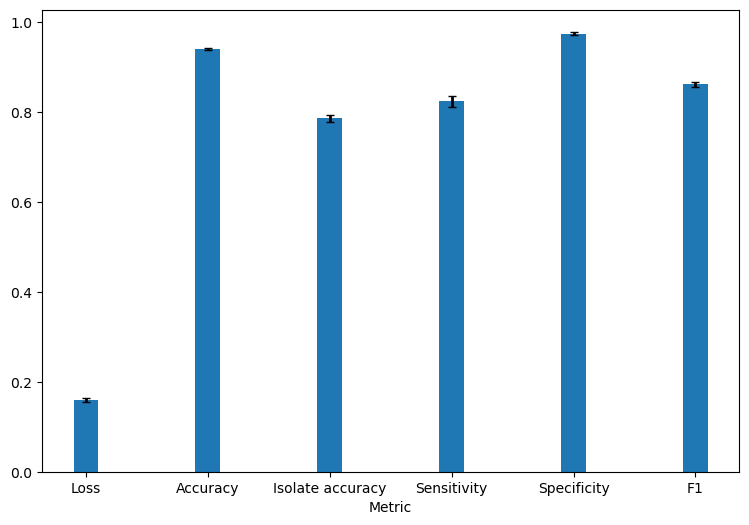

In [111]:
metric_names = ['F1', 'Sensitivity', 'Specificity', 'Accuracy', 'Isolate Accuracy']
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(df_CV['metric'], df_CV['avg'], width=0.2)
ax.errorbar(df_CV['metric'], df_CV['avg'], df_CV['std'], ecolor="k", fmt="none", elinewidth=2, capsize=3)
ax.set_xlabel("Metric")
plt.show()

In [113]:
len(ab_stats_list)

5

In [114]:
ab_stats_list[0]

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
0,AMP,981,535,446,590,391,850,497,353,0.866463,0.791480,0.928972,0.902813,0.843489
1,CAZ,696,491,205,506,190,649,475,174,0.932471,0.848780,0.967413,0.915789,0.881013
2,CIP,1229,1002,227,999,230,1170,971,199,0.951993,0.876652,0.969062,0.865217,0.870897
3,CRO,1116,902,214,912,204,1070,884,186,0.958781,0.869159,0.980044,0.911765,0.889952
4,CTX,151,15,136,13,138,147,12,135,0.973510,0.992647,0.800000,0.978261,0.985401
5,FEP,697,561,136,590,107,644,549,95,0.923960,0.698529,0.978610,0.887850,0.781893
6,GEN,1119,984,135,1028,91,1055,974,81,0.942806,0.600000,0.989837,0.890110,0.716814
7,LVX,540,369,171,364,176,511,352,159,0.946296,0.929825,0.953930,0.903409,0.916427
8,NAL,686,645,41,651,35,666,638,28,0.970845,0.682927,0.989147,0.800000,0.736842
9,TOB,519,478,41,487,32,504,475,29,0.971098,0.707317,0.993724,0.906250,0.794521
